# HW4

## 1. "Hello World" in CVX

Question:

Use CVX to verify the optimal values in the two cases given in the exercise above titled "A simple problem".

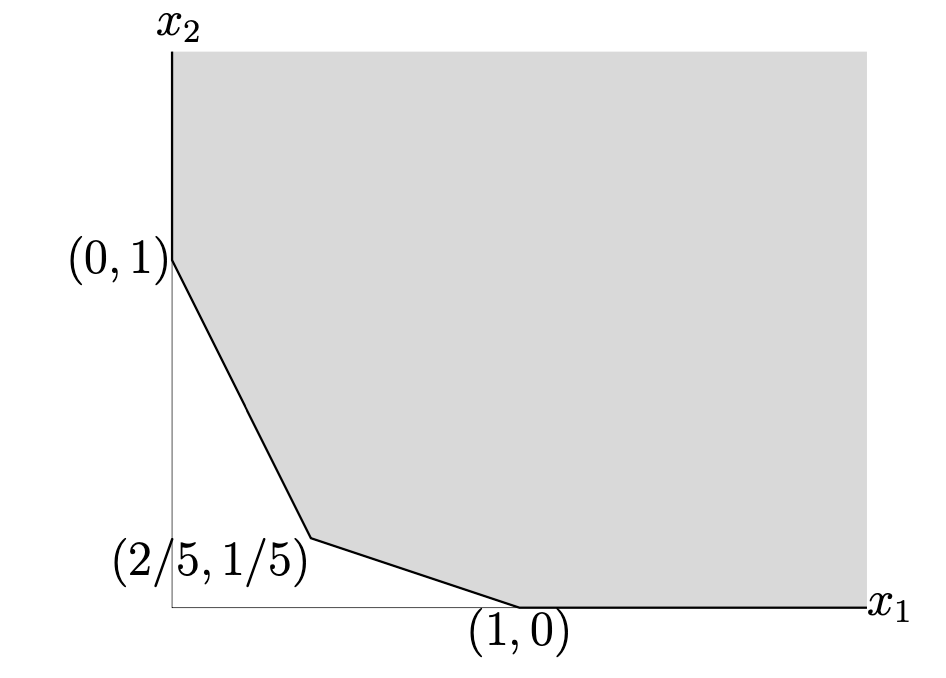

### 1.1

Q: When $f_0(x_1, x_2) = x_1 + x_2$

A: $(\frac{2}{5}, \frac{1}{5})$

In [1]:
import cvxpy as cp

# Create 1 vector optimization variable of shape (2,).
x = cp.Variable(2)

# Create constraints.
constraints = [2 * x[0] + x[1] >= 1,
               x[0] + 3 * x[1] >= 1,
               x >= 0]

# Form objective.
obj = cp.Minimize(sum(x))

# Form and solve problem.
prob1 = cp.Problem(obj, constraints)
prob1.solve()  # Returns the optimal value.
print("status:", prob1.status)
print("optimal value", prob1.value)
print("optimal var", x.value)

status: optimal
optimal value 0.6000000001640435
optimal var [0.4 0.2]


### 1.2

Q: When $f_0(x_1, x_2) = - x_1 - x_2$

A: Unbound

In [2]:
prob2 = cp.Problem(cp.Minimize(- sum(x)), constraints)
prob2.solve()  # Returns the optimal value.
print("status:", prob2.status)
print("optimal value", prob2.value)
print("optimal var", x.value)

status: unbounded
optimal value -inf
optimal var None


### !!1.3

I checked the answer it is a set $X_{\text{opt}} = \{(0, x_2) \mid x_2 \geq 1 \}$
Q: When $f_0(x_1, x_2) = x_1$

A: Not sure how to do that with CVX 

In [3]:
prob3 = cp.Problem(cp.Minimize(x[0]), constraints)
prob3.solve()  # Returns the optimal value.
print("status:", prob3.status)
print("optimal value", prob3.value)
print("optimal var", x.value)

status: optimal
optimal value -1.95729336465049e-11
optimal var [-1.95729336e-11  1.69159744e+00]


### 1.4

Q: When $f_0(x_1, x_2) = \max\{x_1, x_2\}$

A: $(\frac{1}{3}, \frac{1}{3})$

In [4]:
prob4 = cp.Problem(cp.Minimize(cp.max(x)), constraints)
prob4.solve()  # Returns the optimal value.
print("status:", prob4.status)
print("optimal value", prob4.value)
print("optimal var", x.value)

status: optimal
optimal value 0.3333333337083394
optimal var [0.33333333 0.33333333]


### 1.5

Q: When $f_0(x_1, x_2) = x_1^2 + 9 x_2^2$

A: $(\frac{1}{2}, \frac{1}{6})$

In [5]:
prob5 = cp.Problem(cp.Minimize(cp.square(x[0]) + 9 * cp.square(x[1])), constraints)
prob5.solve()  # Returns the optimal value.
print("status:", prob5.status)
print("optimal value", prob5.value)
print("optimal var", x.value)

status: optimal
optimal value 0.49999999999999994
optimal var [0.5        0.16666667]


## Relaxation of Boolean LP
In a Boolean linear program, the variable $x$ is constrained to have components equal to zero or one:

\begin{array}{ll}
    \textrm{minimize} & c^T x \\
    \textrm{subject to} & Ax \preceq b \\
    & x_i \in \{0,1 \}, \quad i=1,\ldots,n.
\end{array}

In general, such problems are very difficult to solve, 
even though the feasible set is finite (containing at most $2^n$ points).

In a general method called relaxation, 
the constraint that $x_i$ be zero or one is replaced with the linear inequalities $0 \leq x_i \leq 1$:

\begin{array}{ll}
    \textrm{minimize} & c^T x \\
    \textrm{subject to} & Ax \preceq b\\
    & 0 \leq x_i \leq 1, \quad i=1,\ldots,n.
\end{array}

We refer to this problem as the *LP relaxation* of the Boolean LP. 
The LP relaxation is far easier to solve than the original Boolean LP.

### What can you say about the optimal value of the LP relaxation?

- [x] It is a lower bound on the optimal value of the Boolean LP

- [ ] It is a upper bound on the optimal value of the Boolean LP

- [ ] It is equal to the optimal value of the Boolean LP

- [ ] Nothing can be concluded

### What can you say about the Boolean LP if the LP relaxation is infeasible?

- [ ] The Boolean LP is feasible if the relaxation is infeasible

- [ ] The Boolean LP is unbounded below if the relaxation is infeasible

- [x] The Boolean LP is infeasible if the relaxation is infeasible

- [ ] Nothing can be concluded

### !! It sometimes happens that the LP relaxation has a solution with $x_i \in \{0, 1 \}$. What can you say in this case?

- [ ] The optimal solution of the relaxation is also optimal for the Boolean LP

- [x] Nothing can be concluded

## Heuristic suboptimal solution for Boolean LP

This exercise builds on exercises 4.15 and 5.13 in _Convex Optimization_, which involve the Boolean LP

\begin{array}{ll}
    \text{minimize} & c^Tx \\
    \text{subject to} & Ax \preceq b\\
    & x_i \in \{0,1\}, \quad i=1, \ldots, n, 
\end{array}

with optimal value $p^*$. Let $x^{\mathrm{rlx}}$ be a solution of the LP relaxation

\begin{array}{ll} 
    \text{minimize} & c^Tx \\
    \text{subject to} & Ax \preceq b\\
    & 0 \preceq  x \preceq \mathbf{1},
\end{array}

so $L= c^Tx^\mathrm{rlx}$ is a lower bound on $p^*$. 
The relaxed solution $x^\mathrm{rlx}$ can also be used to guess a Boolean point $\hat{x}$, 
by rounding its entries, based on a threshold $t \in [0, 1]$:

$$
\hat{x _i} = \left\{
    \begin{array}{ll}1 & x^\mathrm{rlx}_i \geq t\\
    0 & \mathrm{otherwise}, 
    \end{array}\right.
$$

for $i=1, \ldots, n$. Evidently $\hat{x}$ is Boolean (i.e., has entries in $\{0, 1\}$). 
If it is feasible for the Boolean LP, i.e., if $A\hat x \preceq b$, 
then it can be considered a guess at a good, if not optimal, point for the Boolean LP. 
Its objective value, $U=c^T\hat x$, is an upper bound on $p^*$. 
If $U$ and $L$ are close, then $\hat{x}$ is nearly optimal; 
specifically, $\hat{x}$ cannot be more than $(U-L)$-suboptimal for the Boolean LP.

This rounding need not work; indeed, it can happen that for all threshold values, 
$\hat{x}$ is infeasible. But for some problem instances, it can work well.

Of course, there are many variations on this simple scheme for (possibly) c
onstructing a feasible, good point from $x^{\mathrm{rlx}}$.

Finally, we get to the problem. Generate problem data using

```
rng(0,'v5uniform');
n=100;
m=300;
A=rand(m,n);
b=A*ones(n,1)/2;
c=-rand(n,1);
```

Note: in older versions of Matlab, you can initialize the random number generator with

```
rand('state',0);
```

You can think of $x_i$ as a job we either accept or decline, 
and $-c_i$ as the (positive) revenue we generate if we accept job $i$. 
We can think of $Ax \preceq b$ as a set of limits on $m$ resources. 
$A_{ij}$, which is positive, is the amount of resource $i$ consumed if we accept job $j$;
$b_j$ , which is positive, is the amount of resource $i$ available.

Find a solution of the relaxed LP and examine its entries.

In [6]:
import numpy as np

np.random.seed(0)       # Set seed for reproducibility
n = 100
m = 300
A = np.random.rand(m, n)
b = A @ np.ones(n) / 2
c = -np.random.rand(n)


In [7]:
x = cp.Variable(n)

# Create constraints.
constraints = [A @ x <= b,
               x >= 0,
               x <= 1]

# Form objective.
obj = cp.Minimize(c @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
# print("optimal var", x.value)

xrlx = x.value
L = prob.value

status: optimal
optimal value -34.41722426062946


### What is the associated lower bound ?

A: -34.41722426062946

Carry out threshold rounding for (say) $100$ values of $t$, uniformly spaced over $[0, 1]$. 
For each value of $t$, note the objective value $c^T\hat{x}$ and the maximum constraint violation $\max_i (A\hat x-b)_i$. 
Plot the objective value and the maximum violation versus $t$.

Find a value of $t$ for which $\hat{x}$ is feasible, and gives minimum objective value, and note the associated upper bound $U$. 

### What is the gap $U - L$ between the upper bound on $p^*$ and the lower bound on $p^*$?

If you define vectors `obj` and `maxviol`, you can find the upper bound as `U=min(obj(find(maxviol<=0)))`.

In [8]:
import numpy as np

thres = np.arange(0, 1.01, 0.01)
maxviol = np.zeros(len(thres))
obj = np.zeros(len(thres))

for i in range(len(thres)):
    xhat = (xrlx >= thres[i]).astype(float)
    maxviol[i] = np.max(A @ xhat - b)
    obj[i] = c @ xhat


### CHATGPT !!!

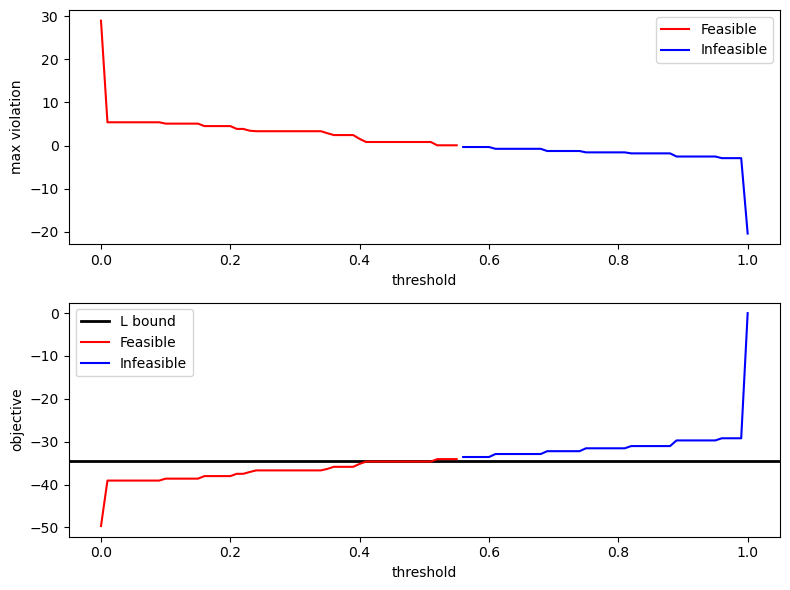

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Find least upper bound and associated threshold
i_feas = np.where(maxviol <= 0)[0]
U = np.min(obj[i_feas])
t = np.min(i_feas)
min_thresh = thres[t]

# Plot objective and max violation versus threshold
plt.figure(figsize=(8, 6))

# First subplot: max violation
plt.subplot(2, 1, 1)
plt.plot(thres[:t], maxviol[:t], 'r', label='Feasible')
plt.plot(thres[t:], maxviol[t:], 'b', label='Infeasible')
plt.xlabel('threshold')
plt.ylabel('max violation')
plt.legend()

# Second subplot: objective value
plt.subplot(2, 1, 2)
plt.axhline(y=L, color='k', linewidth=2, label='L bound')
plt.plot(thres[:t], obj[:t], 'r', label='Feasible')
plt.plot(thres[t:], obj[t:], 'b', label='Infeasible')
plt.xlabel('threshold')
plt.ylabel('objective')
plt.legend()

plt.tight_layout()
plt.show()


## Simple portfolio optimization

We consider a portfolio optimization problem as described on pages 155 and 185–186 of the book, with data that can be found in the file `simple_portfolio_data.m`.

Find minimum-risk portfolios with the same expected return 
as the uniform portfolio $x = (1/n)\mathbf{1}$, 
with risk measured by portfolio return standard deviation, 
and the following portfolio constraints (in addition to $\mathbf{1}^Tx =1$).

### !! Attention, the numbers I run is so different from the answers.

We consider a classical portfolio problem with $n$ assets or stocks held over a period of time. 
We let $x_i$ denote the amount of asset $i$ held throughout the period, with $x_i$ in dollars, 
at the price at the beginning of the period. 
A normal long position in asset $i$ corresponds to $x_i > 0$; 
a short position in asset $i$ (i.e., the obligation to buy the asset at the end of the period) corresponds to $x_i < 0$. 
*meaning that we can not profit from borrowing, too complicated for now*

We let $p_i$ denote the relative price change of asset $i$ over the period, i.e., its change in price over the period divided by its price at the beginning of the period. The overall return on the portfolio ((given in dollars)) is 

$$
r = p^\top x.
$$

The optimization variable is the portfolio vector $x \in \mathbb{R}^n$.

Given the total budget to be invested is $B$, which is often taken to be one.
A wide variety of constraints on the portfolio can be considered. 
The simplest set of constraints is that $x_i \geq 0$ (i.e., no short positions) and 
$$
\mathbf{1}^\top x = B
$$

We take a stochastic model for price changes: 
$p \in \mathbb{R}^n$ is a random vector, with known mean $\bar{p}$ and covariance $\Sigma$. 
Therefore, with portfolio $x \in \mathbb{R}^n$, the return $r$ is a (scalar) random variable with 
mean $\mathbb{E}[r] = \bar{p}^\top x$
and variance $ \text{Var}(r) = x^\top \Sigma x$.

The choice of portfolio $x$ involves a trade-off between the mean of the return and its variance.

In [10]:
import numpy as np

n = 20
np.random.seed(5)

# Equivalent to: pbar = ones(n,1)*.03+[rand(n-1,1); 0]*.12;
# pbar is a random mean for price change
pbar = np.ones(n) * 0.03
pbar[:-1] += np.random.rand(n - 1) * 0.12  # last element stays 0.03


# 'v5normal' is roughly standard normal
# S is a random variance
np.random.seed(5)
S = np.random.randn(n, n)
S = S.T @ S
S = S / np.max(np.abs(np.diag(S))) * 0.2
S[:, n-1] = 0
S[n-1, :] = 0



# Uniform portfolio
x_unif = np.ones(n) / n


### What is the risk of the uniform portfolio?

In [11]:
r_unif = x_unif @ S @ x_unif
print("Risk of uniform portfolio: ", r_unif)

Risk of uniform portfolio:  0.004281504136198748


### What is the risk of an optimal portfolio with no (additional) constraints?



In [12]:
x = cp.Variable(n)

# Correct constraint: match the expected return of uniform portfolio
constraints = [
    cp.sum(x) == 1,
    pbar @ x == pbar @ x_unif
]

# Objective: minimize risk
objective = cp.Minimize(cp.quad_form(x, S))

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Output
print("status:", prob.status)
print("optimal value:", prob.value)
print("optimal value:", x.value)

# Risk under optimal portfolio
r_no = x.value.T @ S @ x.value
print("Risk under no additional constraints:", r_no)

status: optimal
optimal value: 6.00003882632498e-05
optimal value: [ 0.09205371 -0.02348048 -0.06819282  0.08845116  0.12588386  0.01619867
  0.08658422  0.11033239 -0.00570013 -0.10370893 -0.20427587  0.00371378
 -0.03589095  0.1976617   0.11331814  0.12222125  0.09891432  0.02652261
  0.04026356  0.3191298 ]
Risk under no additional constraints: 6.0000388263249535e-05


### What is the risk of a long-only portfolio $x \succeq 0$?



In [13]:
x = cp.Variable(n)

# Correct constraint: match the expected return of uniform portfolio
constraints = [
    cp.sum(x) == 1,
    x >= 0,
    pbar @ x == pbar @ x_unif
]

# Objective: minimize risk
objective = cp.Minimize(cp.quad_form(x, S))

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Output
print("status:", prob.status)
print("optimal value:", prob.value)
print("optimal value:", x.value)

# Risk under optimal portfolio
r_long = x.value.T @ S @ x.value
print("Risk of long-only:", r_long)

status: optimal
optimal value: 0.001489634814657801
optimal value: [ 6.25202538e-02 -1.95537579e-24 -1.58393415e-23  9.06814406e-02
  3.70504373e-02 -2.42232256e-23  4.58202611e-02  5.29810218e-02
  3.02452963e-02  1.03057845e-03 -6.81299822e-23  6.94988353e-02
  3.95592485e-02  1.00379060e-01  8.76855661e-02  7.63927957e-24
  4.50223365e-02  8.48135276e-02  9.12134291e-02  1.61498708e-01]
Risk of long-only: 0.001489634814657801


### What is the risk of a portfolio with a limit on total short position: $\mathbf{1}^T(x_-) \leq 0.5$, where $(x_-)_i = \max\{-x_i,0\}$?



In [14]:
x = cp.Variable(n)

# Correct constraint: match the expected return of uniform portfolio
constraints = [
    cp.sum(x) == 1,
    pbar @ x == pbar @ x_unif,
    np.ones(n) @ cp.maximum(-x, 0) <= 0.5
]

# Objective: minimize risk
objective = cp.Minimize(cp.quad_form(x, S))

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Output
print("status:", prob.status)
print("optimal value:", prob.value)
print("optimal value:", x.value)

# Risk under optimal portfolio
r_more = x.value.T @ S @ x.value
print("Risk of limited short:", r_more)

status: optimal
optimal value: 5.999928656591107e-05
optimal value: [ 0.09204841 -0.02347365 -0.0681837   0.08844995  0.12587396  0.01619703
  0.08658036  0.11033077 -0.00569553 -0.10369766 -0.20426527  0.00371409
 -0.03588537  0.19765008  0.11331322  0.12221637  0.09890908  0.0265251
  0.04026651  0.31912772]
Risk of limited short: 5.999928656591222e-05
